In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

In [2]:
tf.__version__

'0.9.0'

# Load MNIST

In [3]:
mnist = input_data.read_data_sets('mnist', one_hot=True)
image_size = 28 * 28
num_classes = 10
assert mnist.train.images.shape[1] == image_size
assert mnist.train.labels.shape[1] == num_classes

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


# Linear Logistic Regression

In [4]:
learning_rate = 0.05
steps = 200 * 1000
sample = 1000
batch_size = 8

graph = tf.Graph()
sess = tf.Session(graph=graph)

with graph.as_default():
    inputs = tf.placeholder(tf.float32, [None, image_size])
    labels = tf.placeholder(tf.float32, [None, num_classes])

    weight = tf.Variable(tf.truncated_normal([image_size, num_classes], stddev=1), name='a')
    bias = tf.Variable(tf.constant(0.1, shape=[num_classes]), name='bias')
    logits = tf.matmul(inputs, weight) + bias
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))
    
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
    
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    init_variables = tf.initialize_all_variables()

    train_losses = []
    validation_losses = []
    step_records = []
    with sess.as_default():
        init_variables.run()
        for step in xrange(steps):
            batch_input, batch_label = mnist.train.next_batch(batch_size)
            sess.run(train_step, {inputs: batch_input, labels: batch_label})
            if step % sample == 0:
                batch_entropy, batch_accuracy = sess.run((cross_entropy, accuracy), {inputs: batch_input, labels: batch_label})
                train_entropy, train_accuracy = sess.run((cross_entropy, accuracy), {inputs: mnist.train.images, labels: mnist.train.labels})
                validation_entropy, validation_accuracy = sess.run((cross_entropy, accuracy), {inputs: mnist.validation.images, labels: mnist.validation.labels})
                print 'step: %d, batch loss: %f, train loss: %f, train accuracy: %.2f%%, validation loss: %f, validation accuracy: %.2f%%' % (
                    step, batch_entropy, train_entropy, 100. * train_accuracy, validation_entropy, 100. * validation_accuracy)
                if step > 0:
                    step_records.append(step)
                    train_losses.append(train_entropy)
                    validation_losses.append(validation_entropy)

step: 0, batch loss: 10.315619, train loss: 12.232466, train accuracy: 7.45%, validation loss: 12.376769, validation accuracy: 7.48%
step: 1000, batch loss: 0.398619, train loss: 1.324386, train accuracy: 72.95%, validation loss: 1.281298, validation accuracy: 75.60%
step: 2000, batch loss: 1.028669, train loss: 0.934611, train accuracy: 79.87%, validation loss: 0.914769, validation accuracy: 81.32%
step: 3000, batch loss: 0.586172, train loss: 0.786268, train accuracy: 82.79%, validation loss: 0.768607, validation accuracy: 83.70%
step: 4000, batch loss: 0.380030, train loss: 0.717456, train accuracy: 84.01%, validation loss: 0.709984, validation accuracy: 84.84%
step: 5000, batch loss: 0.585375, train loss: 0.648079, train accuracy: 85.17%, validation loss: 0.632494, validation accuracy: 86.16%
step: 6000, batch loss: 0.365921, train loss: 0.612381, train accuracy: 85.69%, validation loss: 0.603611, validation accuracy: 86.22%
step: 7000, batch loss: 0.105980, train loss: 0.574791, t

<module 'matplotlib.pyplot' from '/Users/yunabe/local/homebrew/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

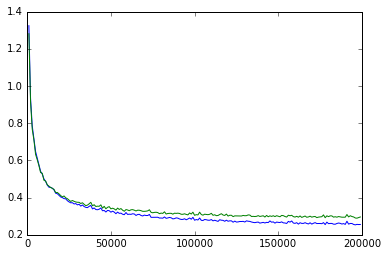

In [5]:
plt.plot(step_records, train_losses)
plt.plot(step_records, validation_losses)
plt.show()